# Open CV - Imagenes y Video
![](https://4.bp.blogspot.com/-Q0XriPVi_KQ/VG9LQyFIy3I/AAAAAAAADVE/pIGGVP3Ft_g/s1600/opencv-python.png)

OpenCV (Open Source Computer Vision Library: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) es una librería de código abierto que incluye varios cientos de algoritmos de computer vision. OpenCV2 4.x API esta basado en código escrito y compilado en C++.

Luis A. Muñoz

---

### *Nota sobre la instalación*

La versión estable para el ecosistema de Anaconda Prompt de OpenCV se puede instalar con la instrucción `conda install -c conda-forge opencv`:

    The following NEW packages will be INSTALLED:

      libopencv          pkgs/main/win-64::libopencv-4.0.1-hbb9e17c_0
      opencv             pkgs/main/win-64::opencv-4.0.1-py38h2a7c758_0
      py-opencv          pkgs/main/win-64::py-opencv-4.0.1-py38he44ac1e_0
      python_abi         conda-forge/win-64::python_abi-3.8-1_cp38


In [41]:
import cv2

## Abrir una imagen
OpenCV es una librería que permite importar imagenes de diferentes formatos. Una imagen se importa como un array n-dimensional. Una imagen en tonos de gris será un arreglo de *n x m*, según las dimensiones de la imagen. Una imagen en color será un arreglo de *n x m x c*, donde *c* será el número de canales de color. Esto quiere decír que cada uno de los tres arreglos contiene la información de la intensidad de los colores Rojos, Verde y Azul (la imagen puede tener un cuarto canal llamado *alpha-channel* que controla la transparencia de la imagen). 

OpenCV utiliza un mapa de colores diferentes al RGB: BGR (Blue, Green, Red).

In [51]:
# Open CV utiliza el mapa de colores BGR (no RGB)
img = cv2.imread("img\\img1.jpg", 1)  # 0 : Gray Scale (cv2.IMREAD_GRAYSCALE)
                                    # >0: Return a 3-color image (cv2.IMREAD_COLOR)
                                    # <0: Return the loaded image with alpha channel (cv2.IMREAD_UNCHANGED)
print(type(img))

<class 'numpy.ndarray'>


Como se observa, la imagen importada es un ndarray cuyas dimensiones dependerán de la imagen y de la forma como se ha interpretado la imagen. Aunque no hemos importado la librería *numpy*, tenemos acceso al arreglo y a sus propiedades y métodos.

In [49]:
print(img)
print("Size:", img.shape)    # Forma del arreglo numpy
print("Dim:", img.ndim)      # Numero de dimensiones
print(img.dtype)

[[200 211 209 ... 152 152 151]
 [206 211 206 ... 150 149 148]
 [208 209 200 ... 149 148 147]
 ...
 [150 167 169 ... 191 170 118]
 [138 158 175 ... 158 145 132]
 [115 138 172 ... 128 133 156]]
Size: (669, 1024)
Dim: 2
uint8


## Ventana de visualización de una imagen
Para mostrar una imagen es necesario no solo adjuntar la imagen a una ventana con `cv2.imshow`, sino que debe declararse la forma de cerrar esta ventana

In [52]:
cv2.imshow("Sample Img", img)
cv2.waitKey(0)        # ms or 0 for close window
cv2.destroyAllWindows()

Para probar un método sobre el arreglo imagen, podemos llamar a `resize` para ajustar las dimensiones del arreglo (y de la imagen), por medio de un proceso de interpolación.

In [53]:
resized_image = cv2.resize(img, (300, 100))

In [54]:
cv2.imshow("Resize Img", resized_image)
cv2.waitKey(0)        # ms or 0 for close window
cv2.destroyAllWindows()

Para ajustar el tamaño de una imagen suele ser común mantener la relación de aspecto (la proporción entre alto y ancho de una imagen). Para esto se puede extraer el tamaño original y operar dirctamente con estos valores. Hay que tener especial cuidado con el hecho de que las dimensiones de un arreglo se especifican como (filas, columnas), mientras que en el caso de una imagen se especifica como (ancho, alto), por lo que hay que invertír la asignación *(fila:alto, columna:ancho)*.

In [55]:
resized_image = cv2.resize(img, (int(img.shape[1]/1.5), int(img.shape[0]/1.5)))
print("Shape:", resized_image.shape)

Shape: (446, 682, 3)


In [58]:
cv2.imshow("Resize Img", resized_image)
cv2.waitKey(0)        # ms or 0 for close window
cv2.destroyAllWindows()

## Guardar una imagen
Podemos guardar una imagen utilizando el método `cv2.imwrite`. Este método retorna un valor booleano para confirmar el proceso

In [57]:
cv2.imwrite("img\\res_img1.jpg", resized_image)

True

## OpenCV y matplotlib
Por incompatibilidad con el modelo BGR (OpenCV) y RGB (matplotlib) se suelen visualizar las imagenes en escala de grises, aunque se puede hacer una conversion de un modelo a otro utilizando el método `cv2.cvtColor(img, FILTER)` a RGB.

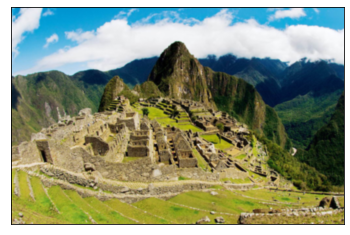

In [64]:
import matplotlib.pyplot as plt
import cv2

#cv_img = cv2.imread("img\\img1.jpg", cv2.IMREAD_GRAYSCALE)
cv_img = cv2.imread("img\\img1.jpg")
cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

#plt.imshow(cv_img, cmap='gray', interpolation='bicubic')
plt.imshow(cv_img_rgb, interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

## OpenCV y tkinter
Insertar una imagen en una aplicación gráfica hecha con tkinter requiere ciertas adecuaciones en la imagen leída utilizando cv2:

* Convertir la imagen de BGR a RGB (colores o escala de grises) con los filtros de `cv2.cvtColor`
* Crear un objeto PIL.PhotoImage del arreglo numpy de la imagen
* Convertir el objeto PIL.PhotoImage en un objeto PIL.ImageTk.PhotoImage para poder insertarlo en un widget
* Insertar la imagen en un Canvas o en un Label y mantener la referencia con *widget.image = imagen insertada*

Este ultimo paso es un detalle técnico que evita que la imagen sea trasparente (y no se vea) por un problema de referencias entre archivos y los objetos Tk (garbage collector)

In [65]:
from tkinter import Tk, Canvas
from PIL import Image, ImageTk     # pillow
import cv2

class App:
    def __init__(self, master):
        width, height = 600, 400
        master.title("Image Viewer")
        master.resizable(0, 0)
        
        self.canvas = Canvas(master, width=width, height=height, borderwidth=1, relief='sunken')
        self.canvas.pack()
    
        cv_img = cv2.imread("img\\img1.jpg")
        cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
        cv_img_re = cv2.resize(cv_img_rgb, (width, height))
        
        try:
            photo = ImageTk.PhotoImage(image=Image.fromarray(cv_img_re))
            self.canvas.create_image(0, 0, image=photo, anchor='nw')
            self.canvas.image = photo    # REFERENCIA - (garbage collector)
        except:
            pass

        
root = Tk()
app = App(root)
root.mainloop()

## Captura de una cámara
OpenCV puede tener acceso a una camara web.

In [67]:
import cv2

cap = cv2.VideoCapture(0)

# Se abre una ventana de video con opciones (formato antiguo)
cv2.namedWindow('WebCam Color', flags=cv2.WINDOW_GUI_NORMAL)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('WebCam Color', frame)
    cv2.imshow('WebCam Gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

### TIP: DroidCam
En caso de no tener un cámara web, se puede utilizar la cámara de un teléfono móvil por medio de una aplicación que permita registrar el dispositivo como una cámara web. Se sugiere utiliza la aplicación [DroidCam](https://play.google.com/store/apps/details?id=com.dev47apps.droidcam&hl=es_PE) en equipos Android, e [ivCam](https://apps.apple.com/us/app/ivcam-webcam/id1164464478) en equipos Apple.

Para el caso de DroidCam, se debe de modificar el código para lograr la conexión. Una vez instalada la aplicación, esta mostrará una pantalla donde mostrará la IP del teléfono en la red por la que podremos realizar la conexión. Hay que realizar la captura de la ruta `http://<direccion_ip>/mjpegfeed?640x480`. Esta dirección captura un fotograma que es procesado por OpenCV.

In [68]:
import cv2

cap = cv2.VideoCapture('http://192.168.1.10:4747/mjpegfeed?640x480')  # Reemplazar por la IP del telefono

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('WebCam Color', frame)
    cv2.imshow('WebCam Gray', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## Guardar un video capturado

In [70]:
import cv2

cap = cv2.VideoCapture(0)
codec = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('img\\cam_out.avi', codec, 20.0, (640, 480))

while True:
    ret, frame = cap.read()
    out.write(frame)
    
    cv2.imshow('WebCam Color', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

## Insertar un video en tkinter

In [1]:
from tkinter import Tk, Frame, Canvas, Button
from PIL import Image, ImageTk
import numpy as np
import cv2

class App:
    def __init__(self, master):
        self.master = master
        self.master.title("Video Feed")
        self.master.resizable(0, 0)
        
        self.cap = cv2.VideoCapture(0)
        self.width = int(self.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        self.height = int(self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        frm1 = Frame(self.master)
        frm1.pack()
        
        self.canvas = Canvas(frm1, width=self.width, height=self.height, borderwidth=1, relief='sunken')
        self.canvas.pack()
        
        ret, frame = self.cap.read()
                
        photo = ImageTk.PhotoImage(image=Image.fromarray(frame))
        self.canvas.create_image(0, 0, image=photo, anchor='nw')
        self.canvas.image = photo
                
        self.cam_loop()
        
        # Manejo del boton "X" de la ventana en Windows
        self.master.protocol("WM_DELETE_WINDOW", self.closing)
        
    def cam_loop(self):
        ret, frame = self.cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            try:
                photo = ImageTk.PhotoImage(image=Image.fromarray(frame))
                self.canvas.create_image(0, 0, image=photo, anchor='nw')
                self.canvas.image = photo
            except:
                pass
            
        self.master.after(20, self.cam_loop)    
        
    def closing(self):
        if self.cap.isOpened():
            self.cap.release()
        self.master.destroy()
        
        
root = Tk()
app = App(root)
root.mainloop()

## Insertar figuras en un imagen

In [3]:
import cv2

cv2.namedWindow("Image")
img = cv2.imread("img\\img2.jpg")

lin = cv2.line(img, pt1=(100, 550), pt2=(600, 550), color=(255, 0, 0), thickness=3)
rec = cv2.rectangle(img, pt1=(240, 360), pt2=(300, 450), color=(0, 255, 0), thickness=2)
cir = cv2.circle(img, center=(800, 100), radius=60, color=(0, 0, 255), thickness=-1)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Insertar figuras en un video
Este script se basa en la gestion de eventos del mouse por parte de OpenCV. Para esto es necesario crear una función que maneje el evento generado por el mouse que estará asociado a un evento gracias a la función cv2.setMouseCallback(window, func), donde func tiene una secuencia de parámetros fija y definida: lo único que cambia es lo que la función hace.

In [2]:
import cv2

COLOR = (0, 0, 255)
pt1 = (0, 0)
pt2 = (0, 0)
topLeft_clicked = False
botRight_clicked = False

def set_figure(event, x, y, flags, param):
    global pt1, pt2, topLeft_clicked, botRight_clicked
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if topLeft_clicked and botRight_clicked:
            pt1 = (0, 0)
            pt2 = (0, 0)
            topLeft_clicked = False
            botRight_clicked = False
            
        if topLeft_clicked == False:
            pt1 = (x, y)
            topLeft_clicked = True
            
        elif botRight_clicked == False:
            pt2 = (x, y)
            botRight_clicked = True

# Se abre una ventana de video con opciones
cv2.namedWindow('WebCam')
# Se asocia un callback a la ventana (funcion)
cv2.setMouseCallback('WebCam', set_figure)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # Dibujar una figura en funcion de los parametros
    if topLeft_clicked:
        cv2.circle(frame, center=pt1, radius=1, color=COLOR, thickness=-1)
        
    if topLeft_clicked and botRight_clicked:
        cv2.circle(frame, center=pt2, radius=1, color=COLOR, thickness=-1)
        cv2.rectangle(frame, pt1, pt2, color=COLOR, thickness=3)
    
    cv2.imshow('WebCam', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

### TIP: Listado de MouseEvents en OpenCV

In [5]:
events = [i for i in dir(cv2) if 'EVENT' in i]
for event in events: print(event)

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP
